# Supervised Learning
## Decision Trees - Sklearn Implementation

Author: Bingchen Wang

Last Updated: 24 Oct, 2022

---
<nav>
    <a href="../../Machine%20Learning.ipynb">Machine Learning</a> |
    <a href="../Supervised Learning.ipynb">Supervised Learning</a> |
    <a href="../Decision Trees.ipynb">Decision Trees</a>
</nav>

---

## Contents
- [Load the packages](#LP)
- [Classification trees](#CT)
    - [Node impunity measures](#NIM)
    - [Fitting a tree using just sepal information](#CT1)
    - [Fitting a tree using all available information](CT2)
- [Regression trees](#RT)
    - [Fitting a regression tree using `bmi` and `s3`](#RT1)
    - [Comparison with linear regression](#RT1_comp)

<a name = "LP"></a>
## Load the packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, gridspec
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.linear_model import LinearRegression
import pandas as pd

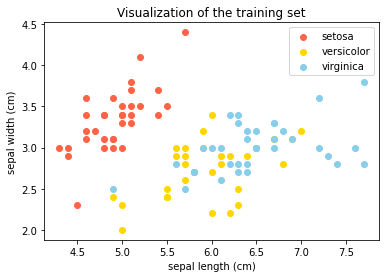

In [ ]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=1)
plt.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c = "tomato", label = iris.target_names[0])
plt.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c = "gold", label = iris.target_names[1])
plt.scatter(X_train[y_train == 2,0], X_train[y_train == 2,1], c = "skyblue", label = iris.target_names[2])
plt.title('Visualization of the training set')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

<a name = "CT"></a>
## Classification trees
<a name = "NIM"></a>
### Node impunity measures

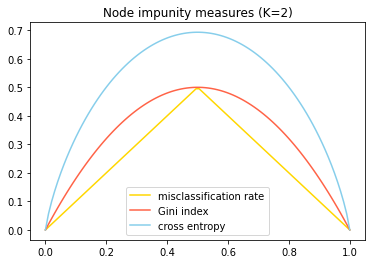

In [5]:
def crossEntropy(p):
    np.seterr('ignore') 
    ce = np.where(np.logical_or(p==0, p==1), 0, - (p*np.log(p) + (1-p)*np.log(1-p)))
    np.seterr('warn') 
    return ce

p = np.linspace(0,1, 100)
mis_rate = 1 - np.max(np.vstack((p, 1-p)), axis = 0)
gini = p*(1-p) + (1-p)*p
crossentropy = crossEntropy(p)
plt.plot(p, mis_rate, c = "gold", label = "misclassification rate")
plt.plot(p, gini, c = "tomato", label = "Gini index")
plt.plot(p, crossentropy, c = "skyblue", label = "cross entropy")
plt.title("Node impunity measures (K=2)")
plt.legend()
plt.show()

<a name = "CT1"></a>
### Fitting a tree using just sepal information

In [6]:
tree1 = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.01)
tree1.fit(X_train[:,:2],y_train)


DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy')

In [7]:
X1_min, X2_min = np.min(iris.data[:,:2], axis = 0)
X1_max, X2_max = np.max(iris.data[:,:2], axis = 0)
X1_span = np.linspace(X1_min, X1_max, 50)
X2_span = np.linspace(X2_min, X2_max, 50)
X1_space, X2_space = np.meshgrid(X1_span, X2_span)
#X_space = np.vstack((X_space[0].reshape(-1),X_space[1].reshape(-1))).transpose()
#leaves_space = tree1.apply(X_space)
#fit_space = tree1.predict(X_space)

fit_space = np.zeros(X1_space.shape)
d1, d2 = fit_space.shape
for i in range(d1):
    for j in range(d2):
        fit_space[i,j] = tree1.predict(np.array([[X1_space[i,j],X2_space[i,j]]]))


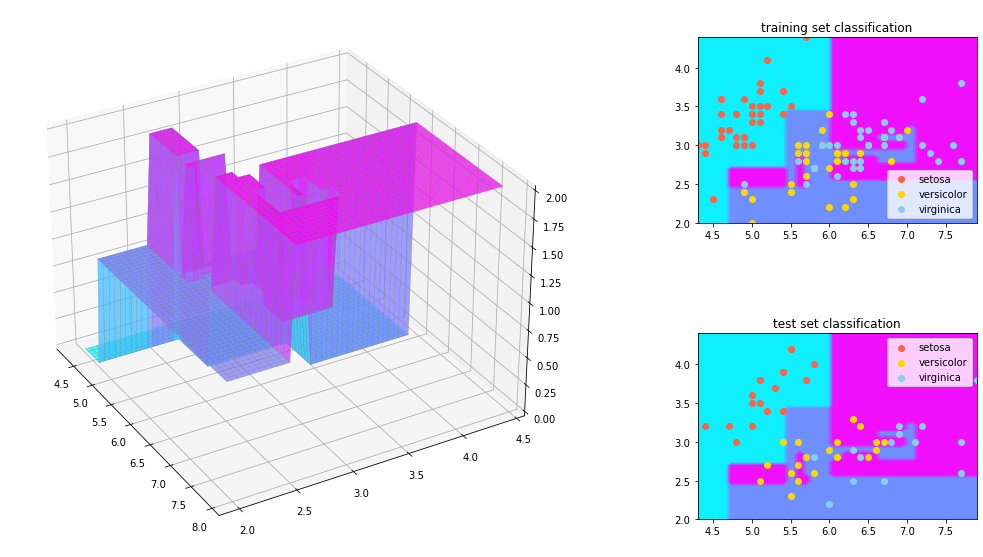

In [8]:
spec = gridspec.GridSpec(ncols=2, nrows=2,
                         width_ratios=[3, 1], wspace=0)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(spec[:,0], projection='3d')
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[1,1])
ax1.plot_surface(X1_space, X2_space, fit_space, cmap=cm.cool, linewidth=0.3, alpha = 0.75, edgecolor = 'gray')
ax1.view_init(elev=30, azim=-30)

ax2.contourf(X1_space, X2_space, fit_space, cmap=cm.cool)
ax2.set_aspect('equal')
ax2.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c = "tomato", label = iris.target_names[0])
ax2.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c = "gold", label = iris.target_names[1])
ax2.scatter(X_train[y_train == 2,0], X_train[y_train == 2,1], c = "skyblue", label = iris.target_names[2])
ax2.set_title('training set classification')
ax2.legend()

ax3.contourf(X1_space, X2_space, fit_space, cmap=cm.cool)
ax3.set_aspect('equal')
ax3.scatter(X_test[y_test == 0,0], X_test[y_test == 0,1], c = "tomato", label = iris.target_names[0])
ax3.scatter(X_test[y_test == 1,0], X_test[y_test == 1,1], c = "gold", label = iris.target_names[1])
ax3.scatter(X_test[y_test == 2,0], X_test[y_test == 2,1], c = "skyblue", label = iris.target_names[2])
ax3.set_title('test set classification')
ax3.legend()

plt.show()

In [9]:
train_fit = tree1.predict(X_train[:,:2])
test_fit = tree1.predict(X_test[:,:2])
train_accuracy = np.mean(y_train == train_fit)
test_accuracy = np.mean(y_test == test_fit)
conf_mat = confusion_matrix(y_test, test_fit, labels = [0,1,2])
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")
print('Clearly, over-fitted!')
print(f"Confusion matrix: \n {conf_mat}")


Train accuracy: 0.94
Test accuracy: 0.64
Clearly, over-fitted!
Confusion matrix: 
 [[17  0  0]
 [ 1  8 10]
 [ 0  7  7]]


<a name = "CT2"></a>
### Fitting a tree using all available information

In [10]:
tree2 = DecisionTreeClassifier(criterion = 'entropy')
tree2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [11]:
train_fit = tree2.predict(X_train)
test_fit = tree2.predict(X_test)
train_accuracy = np.mean(y_train == train_fit)
test_accuracy = np.mean(y_test == test_fit)
conf_mat = confusion_matrix(y_test, test_fit, labels = [0,1,2])
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")
print(f"Confusion matrix: \n {conf_mat}")

Train accuracy: 1.0
Test accuracy: 0.96
Confusion matrix: 
 [[17  0  0]
 [ 0 18  1]
 [ 0  1 13]]


<a name = "RT"></a>
## Regression trees

In [21]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.33, random_state=1)

n_features = X_train.shape[1]
models = [LinearRegression().fit(X_train[:, i].reshape(-1,1), y_train) for i in range(n_features)]
model_fits = [models[i].predict(X_train[:, i].reshape(-1,1)) for  i in range(n_features)]


In [37]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

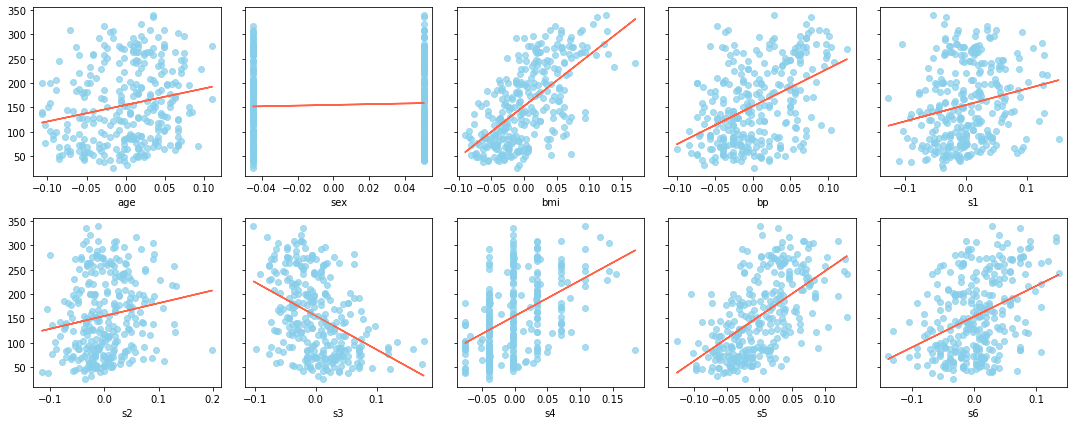

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.00,0.16,0.20,0.34,0.24,0.20,-0.10,0.21,0.30,0.28
sex,0.16,1.00,0.10,0.28,0.01,0.11,-0.37,0.32,0.14,0.21
bmi,0.20,0.10,1.00,0.44,0.22,0.22,-0.40,0.42,0.47,0.40
bp,0.34,0.28,0.44,1.00,0.24,0.19,-0.22,0.29,0.41,0.42
s1,0.24,0.01,0.22,0.24,1.00,0.90,0.08,0.54,0.52,0.31
s2,0.20,0.11,0.22,0.19,0.90,1.00,-0.14,0.63,0.32,0.27
s3,-0.10,-0.37,-0.40,-0.22,0.08,-0.14,1.00,-0.73,-0.41,-0.25
s4,0.21,0.32,0.42,0.29,0.54,0.63,-0.73,1.00,0.64,0.40
s5,0.30,0.14,0.47,0.41,0.52,0.32,-0.41,0.64,1.00,0.46
s6,0.28,0.21,0.40,0.42,0.31,0.27,-0.25,0.40,0.46,1.00


In [52]:
fig, axes = plt.subplots(2, int(n_features/2), figsize = (15,6), sharey = True)

for n in range(axes.size):
    i = n//5
    j = n%5
    axes[i,j].scatter(X_train[:, n], y_train, color = 'skyblue', alpha = 0.7)
    axes[i,j].plot(X_train[:, n], model_fits[n], color = 'tomato')
    axes[i,j].set_xlabel(diabetes.feature_names[n])

fig.tight_layout(pad = 1)
plt.show()

df = pd.DataFrame(X_train, columns = diabetes.feature_names)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision = 2)
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

<a name = "RT1"></a>
### Fitting a regression tree using `bmi` and `s3`

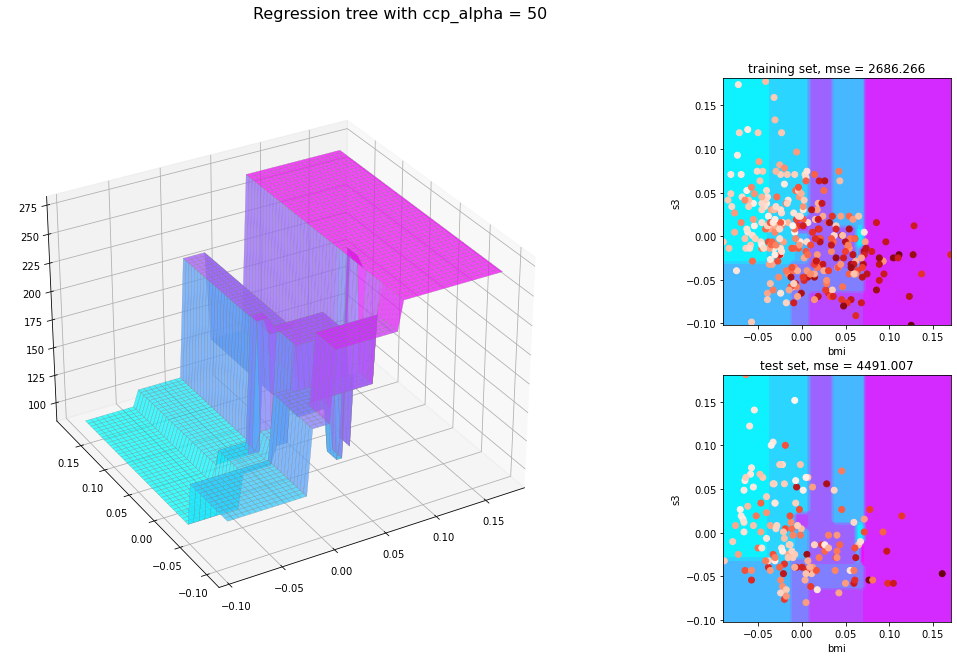

In [103]:
reg_tree = DecisionTreeRegressor(ccp_alpha = 50)
reg_tree.fit(X_train[:,[2,6]],y_train)

X1_min, X2_min = np.min(diabetes.data[:,[2,6]], axis = 0)
X1_max, X2_max = np.max(diabetes.data[:,[2,6]], axis = 0)
X1_span = np.linspace(X1_min, X1_max, 50)
X2_span = np.linspace(X2_min, X2_max, 50)
X1_space, X2_space = np.meshgrid(X1_span, X2_span)
#X_space = np.vstack((X_space[0].reshape(-1),X_space[1].reshape(-1))).transpose()
#leaves_space = tree1.apply(X_space)
#fit_space = tree1.predict(X_space)

fit_space = np.zeros(X1_space.shape)
d1, d2 = fit_space.shape
for i in range(d1):
    for j in range(d2):
        fit_space[i,j] = reg_tree.predict(np.array([[X1_space[i,j],X2_space[i,j]]]))
        
spec = gridspec.GridSpec(ncols=2, nrows=2, width_ratios=[3, 1], wspace=0)
fig = plt.figure(figsize=(20,10))
fig.suptitle("Regression tree with ccp_alpha = 50", fontsize = 16)
ax1 = fig.add_subplot(spec[:,0], projection='3d')
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[1,1])
ax1.plot_surface(X1_space, X2_space, fit_space, cmap=cm.cool, linewidth=0.3, alpha = 0.75, edgecolor = 'gray')
ax1.view_init(elev=30, azim=-120)

ax2.contourf(X1_space, X2_space, fit_space, cmap=cm.cool)
ax2.set_aspect('equal')
ax2.scatter(X_train[:,2], X_train[:,6], c = y_train, cmap = "Reds")
ax2.set_title(f'training set, mse = {np.round(mean_squared_error(y_train, reg_tree.predict(X_train[:,[2,6]])), 3)}')
ax2.set_xlabel(diabetes.feature_names[2])
ax2.set_ylabel(diabetes.feature_names[6])

ax3.contourf(X1_space, X2_space, fit_space, cmap=cm.cool)
ax3.set_aspect('equal')
ax3.scatter(X_test[:,2], X_test[:,6], c = y_test, cmap = "Reds")
ax3.set_title(f'test set, mse = {np.round(mean_squared_error(y_test, reg_tree.predict(X_test[:,[2,6]])), 3)}')
ax3.set_xlabel(diabetes.feature_names[2])
ax3.set_ylabel(diabetes.feature_names[6])

plt.show()

<a name = "RT1_comp"></a>
### Comparision with linear regression

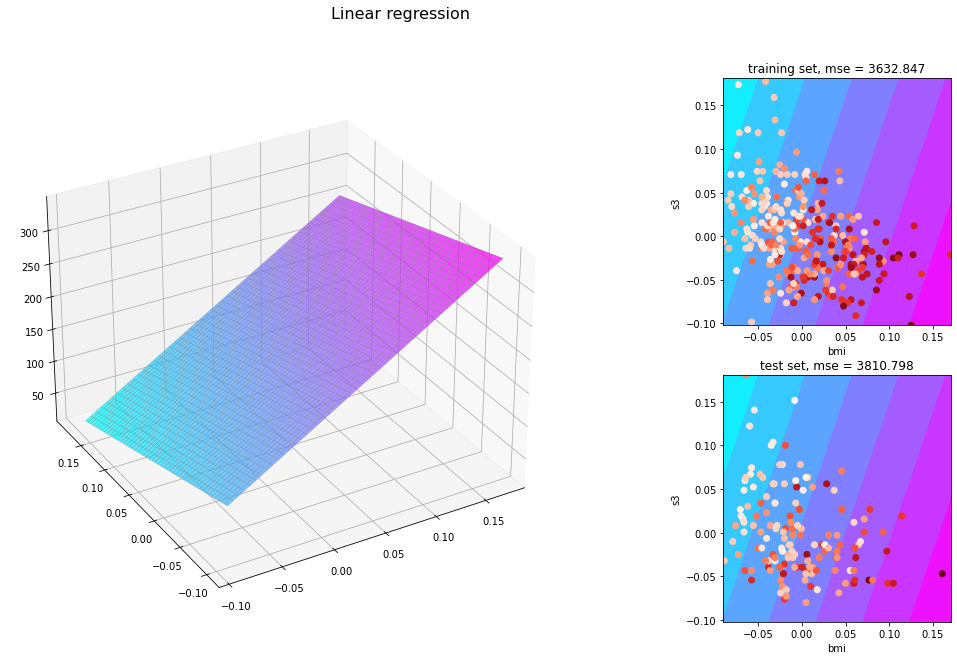

In [104]:
linear_reg = LinearRegression()
linear_reg.fit(X_train[:,[2,6]], y_train)

fit_space2 = np.zeros(X1_space.shape)
for i in range(d1):
    for j in range(d2):
        fit_space2[i,j] = linear_reg.predict(np.array([[X1_space[i,j],X2_space[i,j]]]))
        
spec = gridspec.GridSpec(ncols=2, nrows=2, width_ratios=[3, 1], wspace=0)
fig = plt.figure(figsize=(20,10))
fig.suptitle("Linear regression", fontsize = 16)
ax1 = fig.add_subplot(spec[:,0], projection='3d')
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[1,1])
ax1.plot_surface(X1_space, X2_space, fit_space2, cmap=cm.cool, linewidth=0.3, alpha = 0.75, edgecolor = 'gray')
ax1.view_init(elev=30, azim=-120)

ax2.contourf(X1_space, X2_space, fit_space2, cmap=cm.cool)
ax2.set_aspect('equal')
ax2.scatter(X_train[:,2], X_train[:,6], c = y_train, cmap = "Reds")
ax2.set_title(f'training set, mse = {np.round(mean_squared_error(y_train, linear_reg.predict(X_train[:,[2,6]])), 3)}')
ax2.set_xlabel(diabetes.feature_names[2])
ax2.set_ylabel(diabetes.feature_names[6])

ax3.contourf(X1_space, X2_space, fit_space2, cmap=cm.cool)
ax3.set_aspect('equal')
ax3.scatter(X_test[:,2], X_test[:,6], c = y_test, cmap = "Reds")
ax3.set_title(f'test set, mse = {np.round(mean_squared_error(y_test, linear_reg.predict(X_test[:,[2,6]])), 3)}')
ax3.set_xlabel(diabetes.feature_names[2])
ax3.set_ylabel(diabetes.feature_names[6])

plt.show()